# What is Principal Component Analysis?

## Introduction

Principal Component Analysis (PCA) is a technique to reduce high-dimensional datasets by reducing the number of features. It accomplishes this by combining associated variables together as new variables called **principal components**, which are independent and have most of the variability in the original data. This simplifies data to make it easier to manage, visualize, and analyze — especially for high-dimensional data.

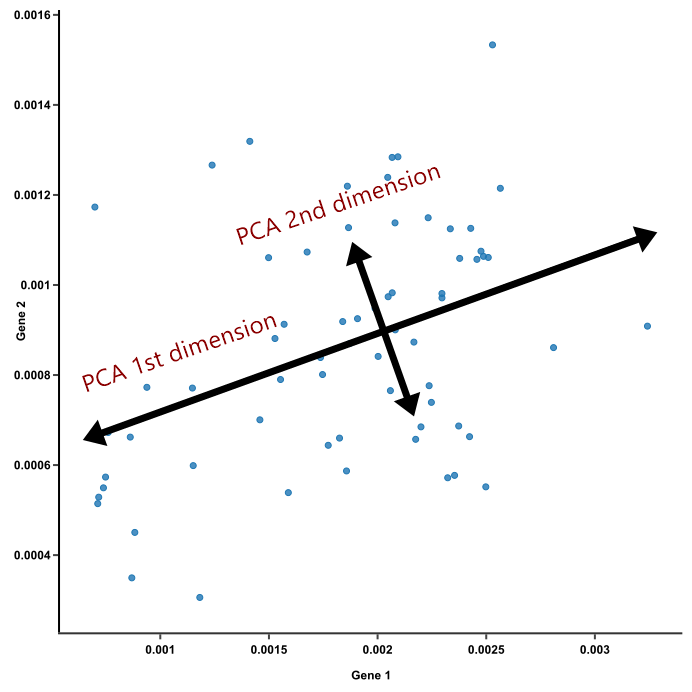

## How Does PCA Work?

PCA finds the directions in which the data is most variable and then projects the data into these directions. Here's step by step how it works:

- **Standardization**: First, we normalize the data such that all features are of equal importance. This makes sure that features whose range is larger don't dominate the results.

- **Covariance Matrix**: We obtain a covariance matrix to understand how different features change with each other.

- **Eigenvalues and Eigenvectors**: Using the covariance matrix, we find eigenvalues and eigenvectors.
- **Eigenvectors** tell us the direction of the new features (principal components).
- **Eigenvalues** tell us about the proportion of variance from the original data that each component captures.

- **Feature Vector Construction**: We sort the eigenvectors based on their respective eigenvalues in decreasing order. The first eigenvectors (having the largest variance) are taken to form the **feature vector**.

- **Data Transformation**: We then employ this feature vector to transform the original data to a new space. The result is a collection of principal components — new features which are uncorrelated and ranked according to the amount of information they preserve.

Once this has been done, we now possess a lower dimensional dataset but we still keep much of the relevant information.

## Advantages and Disadvantages of PCA

### Advantages

- **Simplifies Complexity**: Bypasses the complexity of huge datasets by removing features.
- **Removes Noise**: Expunges lower value variation to leave the pertinent data patterns sharper.
- **Improves Efficiency**: With fewer features, machine learning models can learn faster and sometimes better.

### Drawbacks

- **More Difficult to Interpret**: The new features (principal components) are mixtures of original ones and don't necessarily have an easy interpretation.
- **Loss of Some Data**: PCA retains the most salient variation but can lose smaller, possibly useful details.
- **Assumes Linearity**: PCA performs best if relationships in the data are linear. If patterns in the data are non-linear, PCA can fail to represent them.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

filename = r"C:\Users\pjs5\Downloads\diabetes_dataset_with_notes.csv"
df = pd.read_csv(filename)

df = df.drop(columns=['year', 'clinical_notes'])
df = pd.get_dummies(df, drop_first=True)

X = df.drop(columns=['diabetes'])
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=14)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

clf = DecisionTreeClassifier(random_state=42, max_depth=4, class_weight={0: 1, 1: 2})
clf.fit(X_train_pca, y_train_balanced)

y_pred = clf.predict(X_test_pca)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Saving diabetes_dataset_with_notes.csv to diabetes_dataset_with_notes.csv
Accuracy: 0.89125
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94     18297
           1       0.43      0.82      0.56      1703

    accuracy                           0.89     20000
   macro avg       0.70      0.86      0.75     20000
weighted avg       0.93      0.89      0.91     20000



#Confusion Matrix

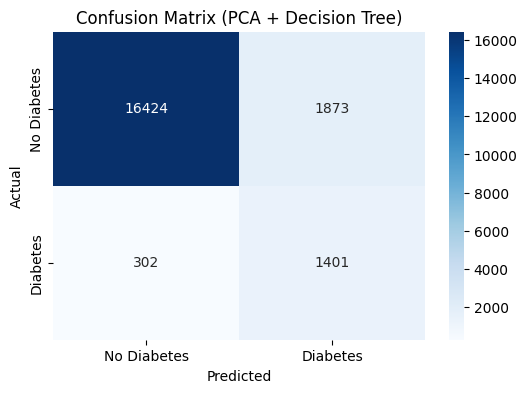

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (PCA + Decision Tree)')
plt.show()

This model which uses PCA and Decision Tree Classifier predicts a patient with diabetes 1401/(1401+302) = 82% of the time. This is worse than the decision tree classifier that does not use PCA. This is to be expected as PCA does inherantly removes information in order to reduce the dimensionality of the data.

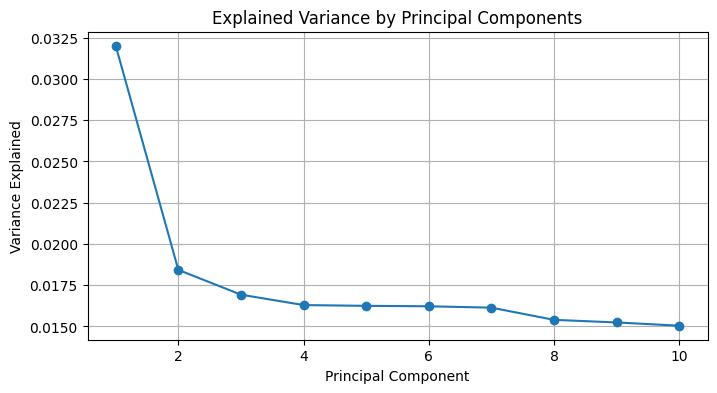

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()

This chart shows that there are diminishing returns as principal components are added. The amount of variance explained changes substantially from 1 to 2 principal components but the rate of change slows down substantially as more principal components are added.